# Análise Exploratória dos Dados

## Setup

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams
from math import inf
from shutil import copy2

# Matplotlib options
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.grid'] = False
plt.style.use('seaborn-deep')

# Pandas setup
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', -1) 

In [2]:
# Read file
path = "./Tidy_Entities/"
name = "p2"
filename = name + ".csv"
df = pd.read_csv(path + filename, encoding='utf8')

# Transformations
df["DATE"] =  pd.to_datetime(df["DATE"], format="%Y-%m-%d")
df = df.sort_values("DATE").set_index("DATE")
df.drop(columns=["ENTIDADE"], inplace=True)

## Verificar Informações do Dataset

In [3]:
df.dtypes

ALUMÍNIO                      float64
ARSÊNIO                       float64
BORO                          float64
BÁRIO                         float64
CHUMBO                        float64
CIANETO                       float64
COBALTO                       float64
COBRE                         float64
COLIFORMES_TERMOTOLERANTES    float64
COR_VERDADEIRA                float64
CROMO                         float64
CROMO_HEXAVALENTE             float64
CÁDMIO                        float64
DBO                           float64
DQO                           float64
ESTANHO                       float64
FENOL                         float64
FERRO                         float64
FLUORETO                      float64
FÓSFORO                       float64
LÍTIO                         float64
MANGANÊS                      float64
MERCÚRIO                      float64
MOLIBDÊNIO                    float64
NITROGÊNIO                    float64
NITROGÊNIO_AMONIACAL          float64
NITROGÊNIO_K

In [4]:
print(
    f"\033[31mLinhas: {df.shape[0]}\n"
    f"Colunas: {df.shape[1]}\n\n"
    f"\033[32m-> Variáveis: \n{df.columns.tolist()}\n\n"
    f"\033[34m-> Valores ÚNICOS: \n{df.nunique().sort_values(ascending=False)}\n\n"
    f"\033[36m-> Valores FALTANTES: \n{df.isnull().sum().sort_values(ascending=True)}\033[0"
)

Linhas: 88
Colunas: 34

-> Variáveis: 
['ALUMÍNIO', 'ARSÊNIO', 'BORO', 'BÁRIO', 'CHUMBO', 'CIANETO', 'COBALTO', 'COBRE', 'COLIFORMES_TERMOTOLERANTES', 'COR_VERDADEIRA', 'CROMO', 'CROMO_HEXAVALENTE', 'CÁDMIO', 'DBO', 'DQO', 'ESTANHO', 'FENOL', 'FERRO', 'FLUORETO', 'FÓSFORO', 'LÍTIO', 'MANGANÊS', 'MERCÚRIO', 'MOLIBDÊNIO', 'NITROGÊNIO', 'NITROGÊNIO_AMONIACAL', 'NITROGÊNIO_KJELDAHL', 'NÍQUEL', 'PH', 'PRATA', 'SURFACTANTES', 'SÓLIDOS', 'ÍNDICE_DE_FENÓIS', 'ÓLEOS']

-> Valores ÚNICOS: 
DQO                           81
NITROGÊNIO                    80
FÓSFORO                       74
SÓLIDOS                       70
DBO                           66
COLIFORMES_TERMOTOLERANTES    64
SURFACTANTES                  43
ÓLEOS                         34
FLUORETO                      28
ALUMÍNIO                      28
FERRO                         27
MANGANÊS                      26
NITROGÊNIO_AMONIACAL          26
PH                            22
COR_VERDADEIRA                22
NITROGÊNIO_KJELDAHL 

### Selecionar features com no mínimo 60% de valores VÁLIDOS || 40% NULOS

In [5]:
# Remove colunas com percentual de nulos acima do limite
aux = pd.DataFrame(df.isnull().sum() / df.shape[0], columns=["NULL_COUNT"])
null_ratio = .40 # limite
features = aux[aux["NULL_COUNT"] <= null_ratio].index.tolist()
filtered = df[features]

print(
    f"{df.shape[1] - df[features].shape[1]} colunas removidas:\n"
    f"{set(df.columns) - set(features)}\n"
)

24 colunas removidas:
{'ALUMÍNIO', 'NÍQUEL', 'CIANETO', 'ARSÊNIO', 'CROMO', 'LÍTIO', 'FERRO', 'MANGANÊS', 'NITROGÊNIO_AMONIACAL', 'MOLIBDÊNIO', 'FENOL', 'BORO', 'NITROGÊNIO_KJELDAHL', 'ESTANHO', 'PRATA', 'CÁDMIO', 'MERCÚRIO', 'COBALTO', 'FLUORETO', 'CROMO_HEXAVALENTE', 'CHUMBO', 'BÁRIO', 'COBRE', 'ÍNDICE_DE_FENÓIS'}



In [6]:
# Ordena os features por quantidade de nulos
threshold = (1 - df.isnull().sum() / df.shape[0]) 
threshold = pd.Series(np.around(threshold.values, 2), index=threshold.index)
threshold = threshold.sort_values(ascending=False)

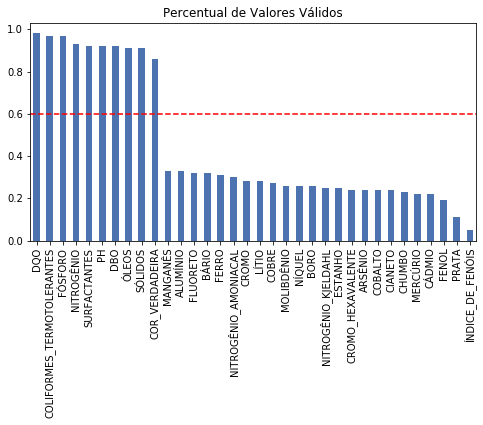

In [7]:
# Plota o diff dos valores selecionados e excluídos
plt.figure(figsize=(5,2))
threshold.plot.bar(figsize=(8, 4))

# Insere barra horizontal no limiar dos features selecionados
plt.axhline(y=(1 - null_ratio), color="red", linewidth=1.5, linestyle="--")
plt.xticks(rotation=90)
plt.title("Percentual de Valores Válidos");

## Análise de Séries Históricas

### Verificar valores faltantes na série histórica

In [8]:
filtered.isna().sum()

COLIFORMES_TERMOTOLERANTES    3 
COR_VERDADEIRA                12
DBO                           7 
DQO                           2 
FÓSFORO                       3 
NITROGÊNIO                    6 
PH                            7 
SURFACTANTES                  7 
SÓLIDOS                       8 
ÓLEOS                         8 
dtype: int64

### Verificar a posição dos valores faltantes

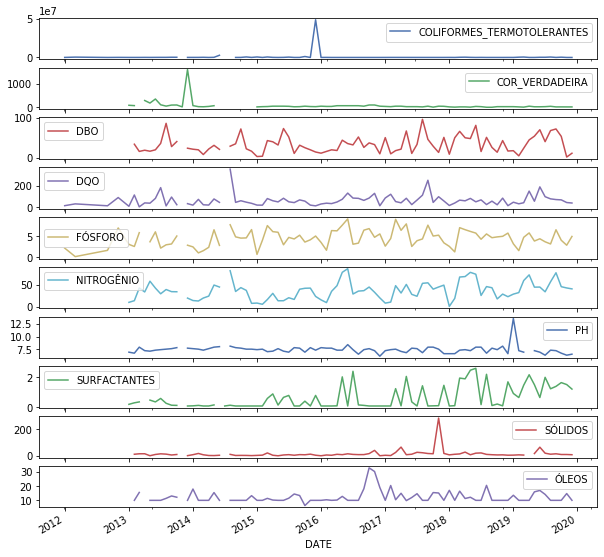

In [9]:
filtered.plot(subplots=True, figsize=(10, 10));

### Plotar séries históricas agregando por média anual, intervalo de confiança 95%


In [10]:
# Ordenando dados
ordered_columns = filtered.isnull().sum().sort_values(ascending=True).index
df_ordered = filtered[ordered_columns]
df_ordered["YEAR"] = [timestamp.year for timestamp in df_ordered.index]
cols = df_ordered.columns[:-1]
# Removendo ano de 2019 para validação do modelo de predição
validation = df_ordered.query("YEAR == 2019")
df_ordered.drop(labels=validation.index, axis=0, inplace=True)

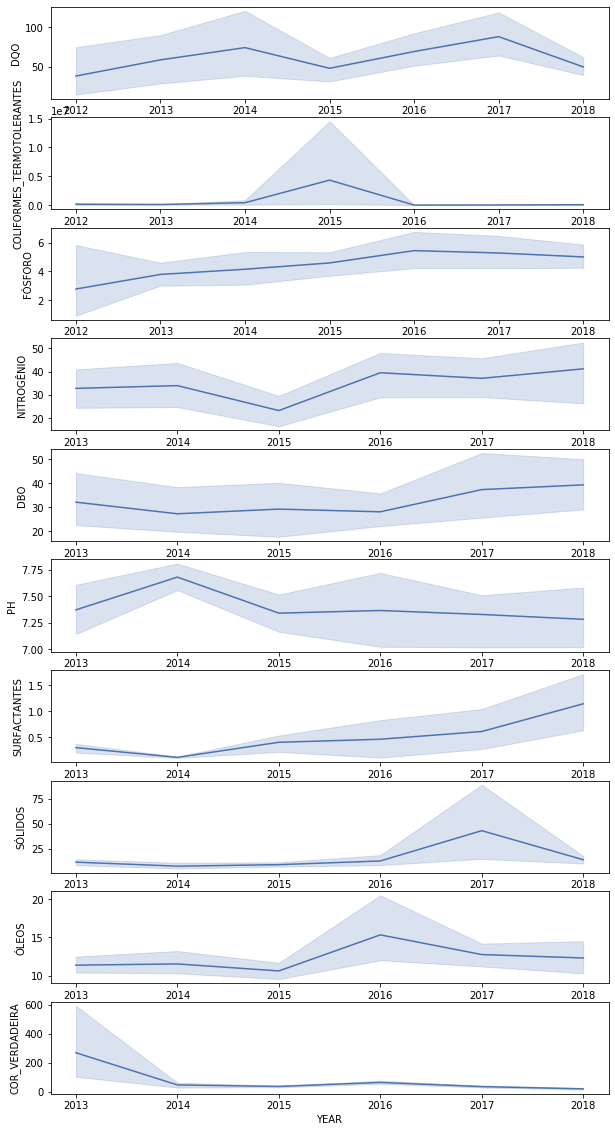

In [11]:
# Plotando séries históricas
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(2 * len(cols))

for key, col in enumerate(cols):
    sns.lineplot(
        data=df_ordered, 
        x="YEAR", 
        y=col, 
        estimator="mean",
        ci=95,
        n_boot=100, 
        ax=axs[key]
    );

### Identificando outliers nos dados agregados por ano


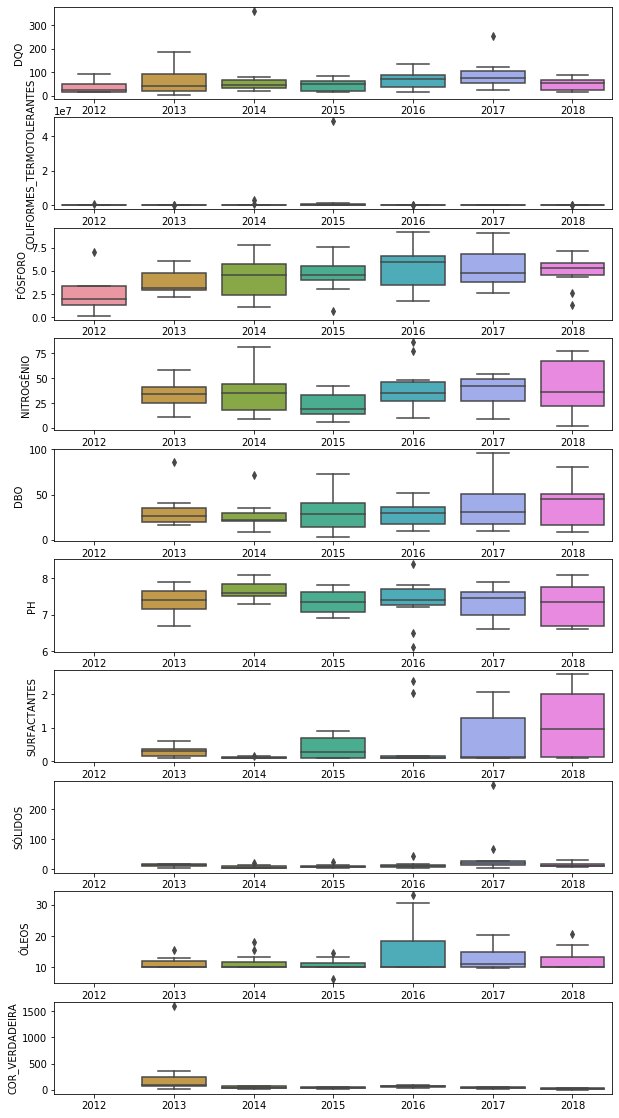

In [12]:
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(2 * len(cols))

for key, col in enumerate(cols):
    g = sns.boxplot(
        data=df_ordered, 
        x="YEAR", 
        y=col,  
        ax=axs[key]
    )
    g.set_xlabel("");

# Modelagem de Features

## Limitando Outliers

### Corrigindo outliers para os limites anuais de intervalo interquartil entre 5 e 95%
Queremos apenas corrigir os outliers de casos muito extremos que possam interferir na interpretação da série, pois podem inferir na geração de tendências ou mudança na interpretação do comportamento da série. Os outliers capturados provavelmente ocorreram devido a falhas na leitura ou transcrição dos dados. Queremos conservar outliers de eventos atípicos (i.e. pico de registros).

In [13]:
# Clipar cada outlier baseado no IQR anual da observação
df_clipped = df_ordered.copy()
lower_boundary = df_ordered.groupby("YEAR").quantile(0.05)
lower_boundary.fillna(-inf, inplace=True)
upper_boundary = df_ordered.groupby("YEAR").quantile(0.95)
upper_boundary.fillna(inf, inplace=True)

years = df_ordered.index.year.unique().tolist()
cols = df_ordered.columns[:-1]

for col in cols:
    series = []
    for year in years:
        partial = df_ordered[df_ordered.index.year == year][col].clip(
            lower=lower_boundary[lower_boundary.index == year][col].values[0],
            upper=upper_boundary[upper_boundary.index == year][col].values[0]
        )

        series.append(partial)

    flattened = [val for sublist in series for val in sublist]
    df_clipped[col] = flattened

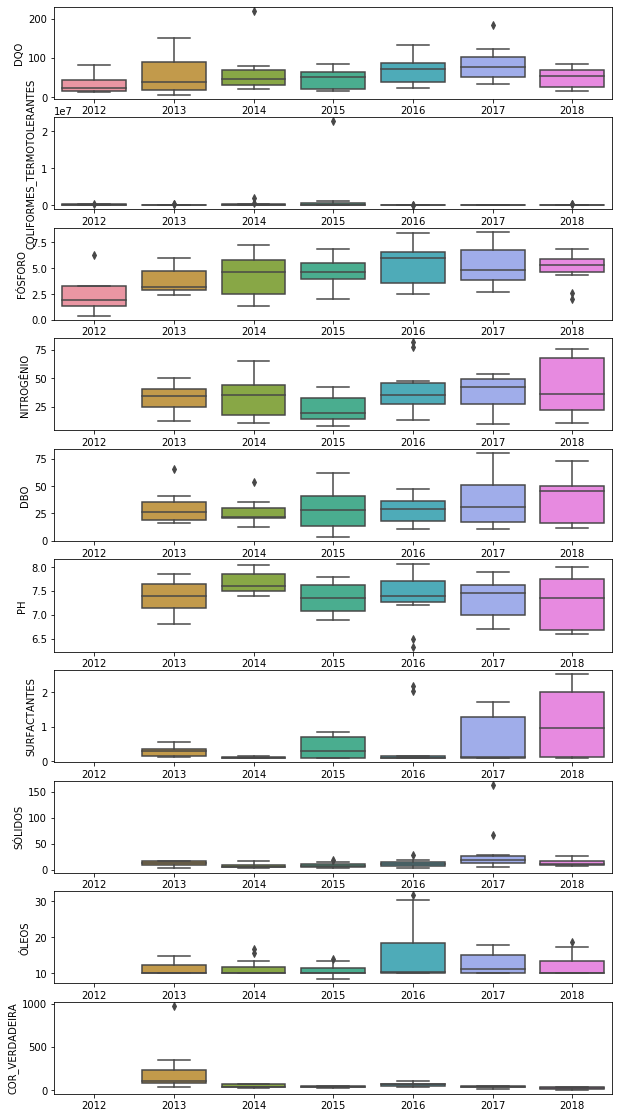

In [14]:
# Plotar boxplot anual de cada coluna
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(2 * len(cols))

for key, col in enumerate(cols):
    g = sns.boxplot(
        data=df_clipped, 
        x="YEAR", 
        y=col,  
        ax=axs[key]
    )
    g.set_xlabel("");

### Série Histórica Clipada

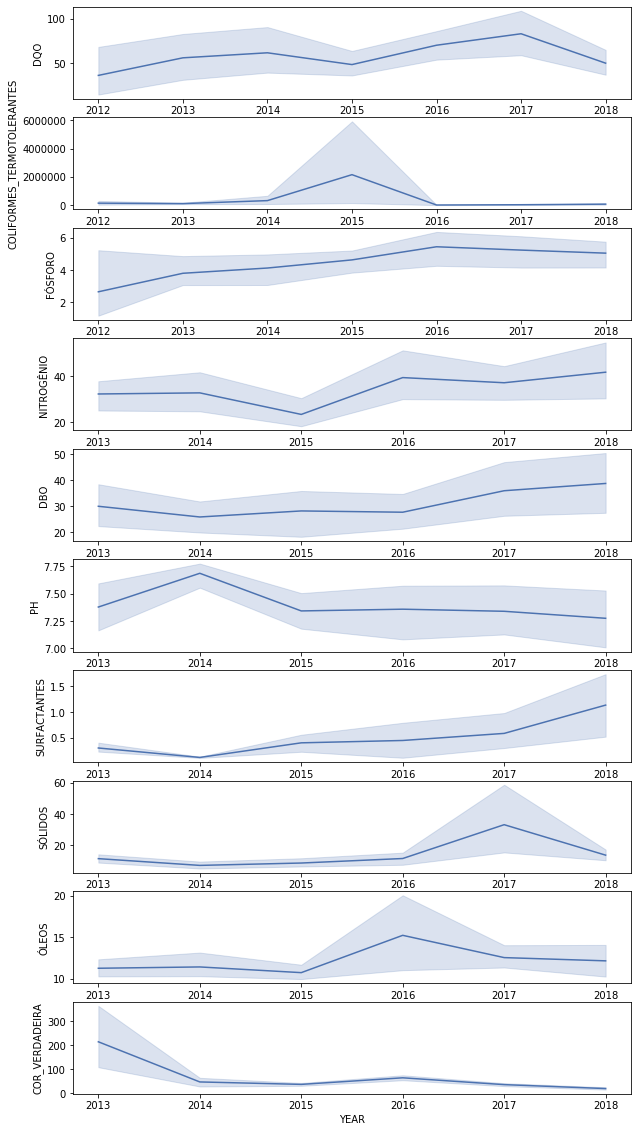

In [15]:
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(2 * len(cols))
fig.set_label("")

for key, col in enumerate(cols):
    sns.lineplot(
        data=df_clipped, 
        x="YEAR",
        y=col, 
        estimator="mean",
        ci=95,
        n_boot=100, 
        ax=axs[key]
    );

## Imputando média ponderada anual nos dados faltantes
Foi verificado que os dados históricos com maior periodicidade possuem no mínimo registros a cada 3-4 meses, portanto será utilizada a média ponderada contendo número de vizinhos igual a 11. Os pesos da média ponderada são dados por distância, os valores mais próximos da data recebem maior importância e vão sendo gradativamente reduzidos.

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(
    missing_values=np.nan, 
    n_neighbors=11, 
    weights='distance', 
    metric='nan_euclidean', 
    copy=True
)

df_imputed = pd.DataFrame(imputer.fit_transform(df_clipped), index=df_clipped.index, columns=df_clipped.columns)

## Verificando Normalidade dos Dados Modelados
### Shapiro-Wilk
Realizando o teste Shapiro-Wilk para verificar se os dados são provenientes de uma distribuição normal, considerando $\alpha = 0.01$.

Se Se $p-valor$ > $\alpha$: Falha em rejeitar $H_0$, a série é proveniente de distribuição normal;

Se Se $p-valor$ < $\alpha$: Forte evidência para rejeitar $H_0$, a série não é proveniente de distribuição normal.

In [17]:
from scipy.stats import shapiro 

alpha = 0.01
outcome = pd.DataFrame()
for col in cols:
    test = shapiro(df_imputed[col])
    outcome = outcome.append({
        "column": col, 
        "pass": test[1] < alpha, 
        "p_value": test[1]
    }, ignore_index=True)

print("São provenientes de distro normal: \n", outcome[outcome["pass"] == 0], "\n")
print("Não são provenientes de distro normal: \n", outcome[outcome["pass"] == 1])

São provenientes de distro normal: 
        column   p_value  pass
2  FÓSFORO     0.377579  0.0 
3  NITROGÊNIO  0.010897  0.0  

Não são provenientes de distro normal: 
                        column       p_value  pass
0  DQO                         1.067734e-05  1.0 
1  COLIFORMES_TERMOTOLERANTES  5.374544e-19  1.0 
4  DBO                         1.026668e-03  1.0 
5  PH                          2.979772e-03  1.0 
6  SURFACTANTES                1.034871e-12  1.0 
7  SÓLIDOS                     5.607547e-16  1.0 
8  ÓLEOS                       6.645348e-13  1.0 
9  COR_VERDADEIRA              6.883707e-17  1.0 


### Teste de Dickey-Fuller aumentado
Verifica o quão dependente uma série temporal é definida por uma tendência (e.g. tempo)

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/223b7673f7bf871d08b19fb9a3c6ae1f0f619a0b" />
<br/>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/35cd48a299a6ffb3139b214b729353bd3e9be12d" />

Se $p-valor$ > $\alpha$: Falha em rejeitar $H_0$, possui raiz unitária, a série é não estacionária.

Se $p-valor$ < $\alpha$: Há forte evidência para rejeitar $H_0$, não existe raiz unitária do processo, a série é estacionária.

São estacionários: 

    adf_statistic                      column       p_value  pass
1 -8.736928       COLIFORMES_TERMOTOLERANTES  3.082277e-14  1.0 
0 -8.547247       DQO                         9.430280e-14  1.0 
9 -7.773745       COR_VERDADEIRA              8.780630e-12  1.0 
7 -7.671450       SÓLIDOS                     1.589628e-11  1.0 
4 -7.571255       DBO                         2.837361e-11  1.0 
5 -6.886930       PH                          1.386917e-09  1.0 
2 -6.618872       FÓSFORO                     6.108373e-09  1.0 
8 -5.264332       ÓLEOS                       6.488306e-06  1.0 
3 -5.136097       NITROGÊNIO                  1.185582e-05  1.0  



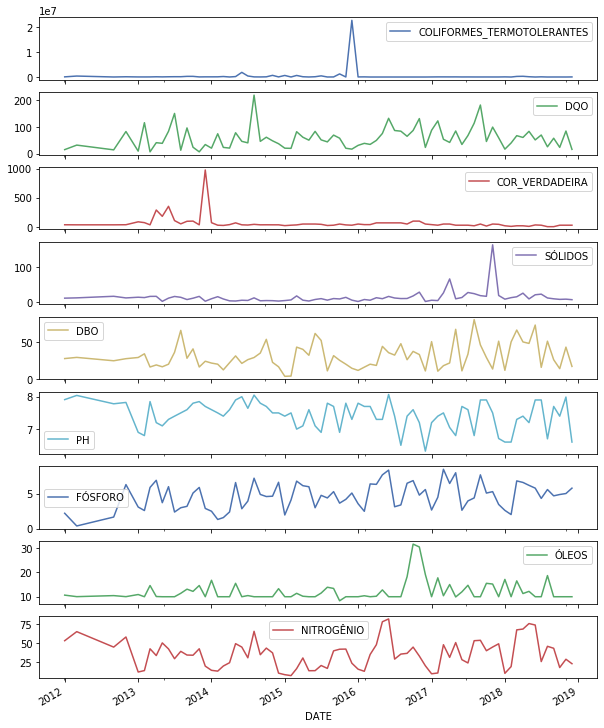

In [18]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.01
outcome = pd.DataFrame()
for col in cols:
    test = adfuller(df_imputed[col])
    outcome = outcome.append({
        "column": col,
        "adf_statistic": test[0],
        "pass": test[1] < alpha, 
        "p_value": test[1]
    }, ignore_index=True)

stationary = outcome[outcome["pass"] == 1].sort_values(by="adf_statistic")
non_stationary = outcome[outcome["pass"] == 0].sort_values(by="adf_statistic")

print("\033[32mSão estacionários: \n\n", stationary, "\n")

if len(stationary) != 0:
    df_imputed[stationary.column.values].plot(subplots=True, figsize=(10, 1.5 * len(stationary)));

São não-estacionários: 

    adf_statistic        column   p_value  pass
6  2.153355       SURFACTANTES  0.998842  0.0  



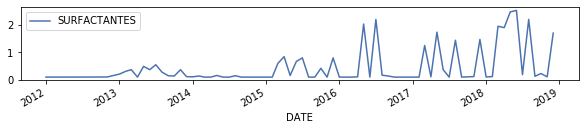

In [19]:
print("\033[34mSão não-estacionários: \n\n", non_stationary, "\n\033[0m")

if len(non_stationary) != 0:
    df_imputed[non_stationary.column.values].plot(subplots=True, figsize=(10, 1.5 * len(non_stationary)));

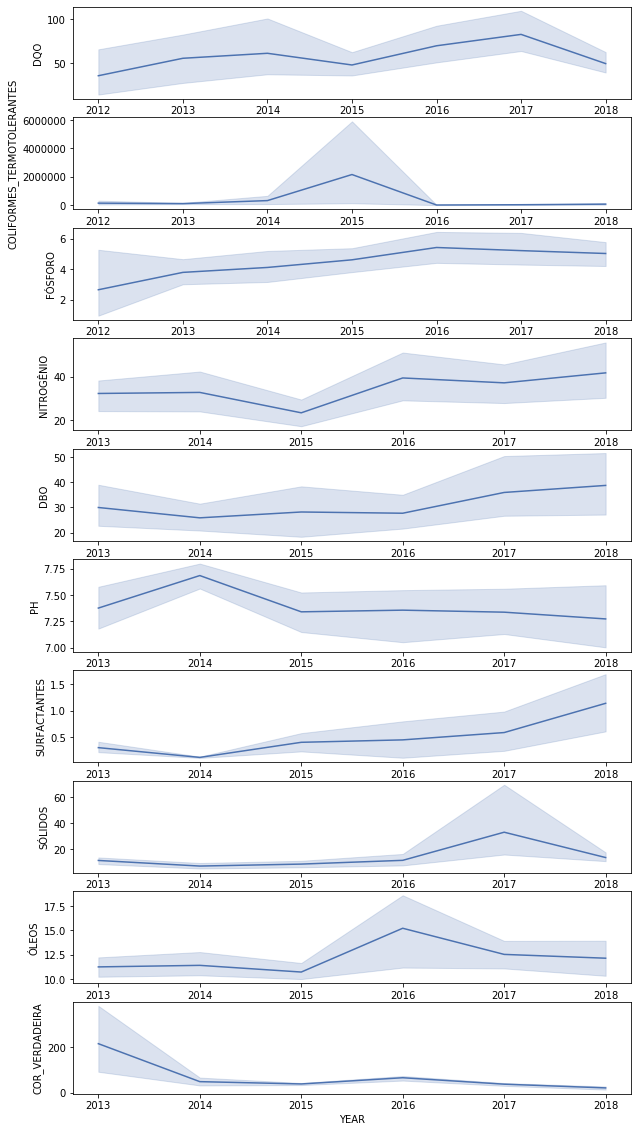

In [20]:
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(2 * len(cols))
fig.set_label("")

for key, col in enumerate(cols):
    sns.lineplot(
        data=df_clipped, 
        x="YEAR",
        y=col, 
        estimator="mean",
        ci=95,
        n_boot=100, 
        ax=axs[key]
    );

## Plotando Mapa de calor das séries para verificar o comportamento ao longo do tempo

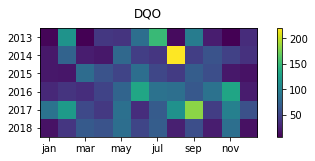

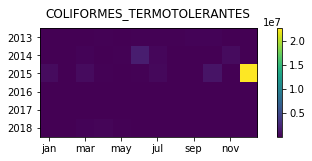

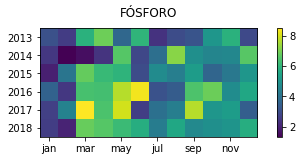

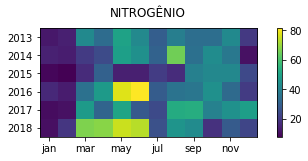

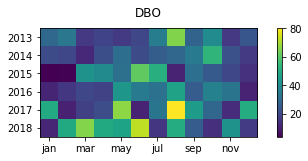

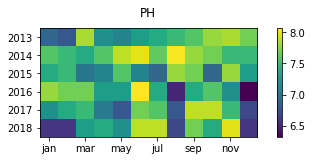

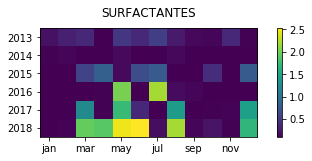

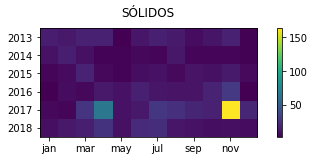

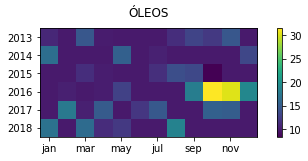

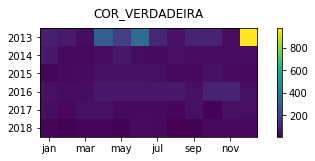

In [21]:
df_sub = df_imputed.copy()
x_labels = [0, 'jan', 'mar', 'may', 'jul', 'sep', 'nov', 'dec']

# define series
for i in range(df_sub.shape[1] - 1):
    series = pd.Series(df_sub[cols[i]], index=pd.to_datetime(df_sub.index))
    series.index = series.index.year
    series.drop(labels="2012", inplace=True)
    groups = series.groupby(series.index)
    plots = pd.DataFrame()

    for idx, group in groups:
        plots[idx] = group.values

    plots = plots.T

    # plot heatmap
    fig = plt.figure(figsize=(7, 2))
    axes = fig.add_subplot()
    caxes = axes.matshow(plots, interpolation="nearest")
    axes.set_title(cols[i])
    axes.set_xticklabels(x_labels)
    axes.set_yticklabels(years) 
    axes.xaxis.set_ticks_position('bottom')
    fig.colorbar(caxes)

## Lag Plot das Séries temporais

O lag plot da série temporal é utilizado para verificar a correlação entre observações da série e suas observações anteriores (defasagens/lags). Quanto mais correlacionada, mais precisa será a previsão do valor futuro utilizando valores da janela de observações.

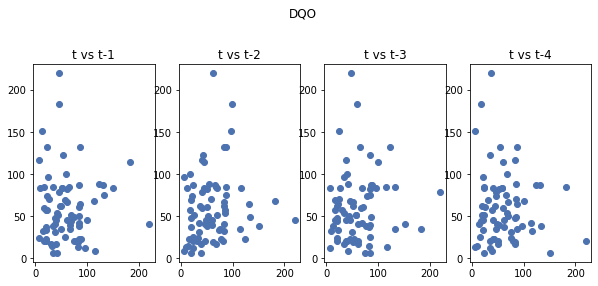

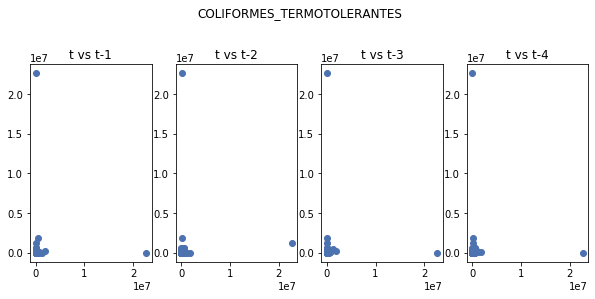

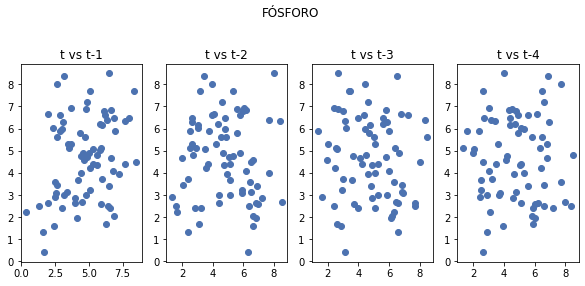

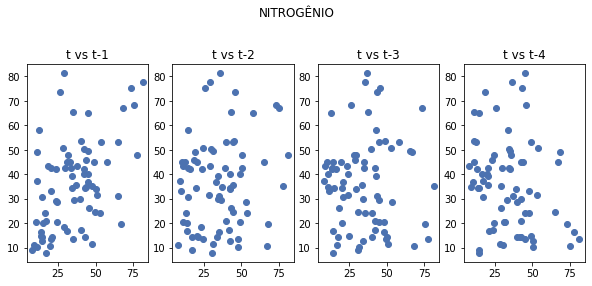

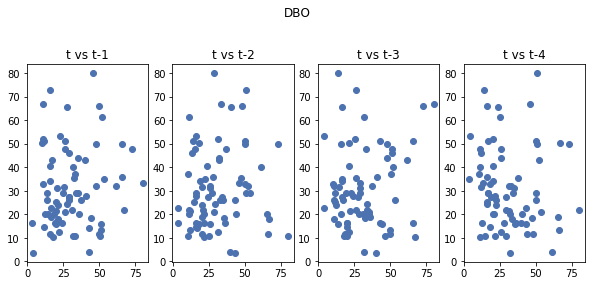

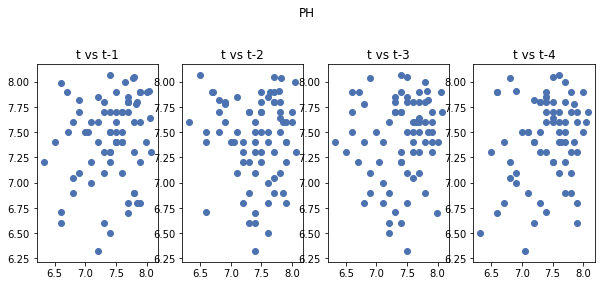

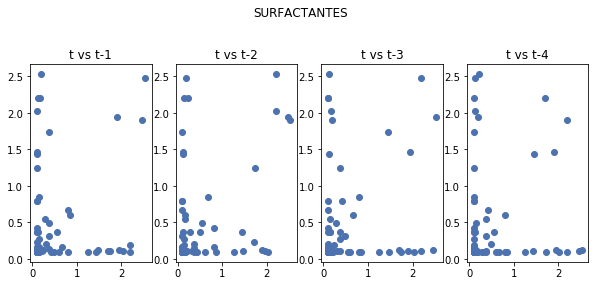

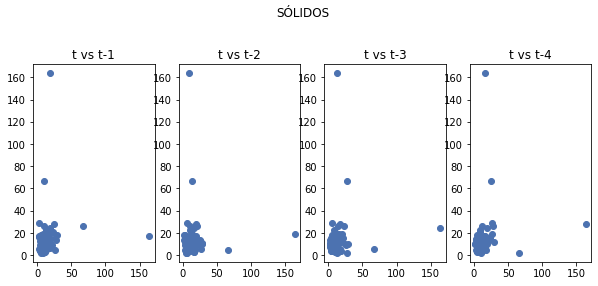

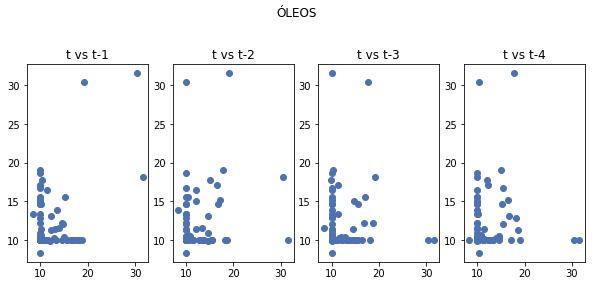

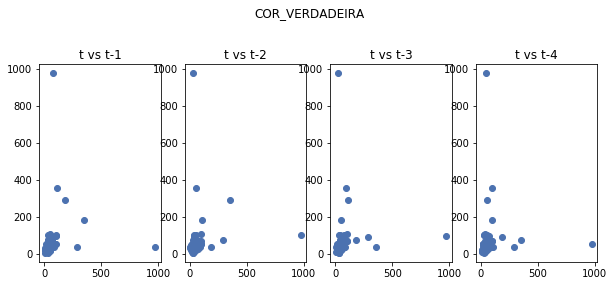

In [22]:
# Plotar série de defasagens
for idx, col in enumerate(cols):
    series = df_sub[col]
    values = pd.DataFrame(series.values)
    lags = 4
    columns = [values]

    # definir t
    for i in range(1,(lags + 1)):
        columns.append(values.shift(i))
    dataframe = pd.concat(columns, axis=1)
    columns = ['t']

    # definir lag
    for i in range(1,(lags + 1)):
        columns.append('t-' + str(i))
    dataframe.columns = columns
    
    # plotar lag scatterplot
    plt.figure(idx)

    for i in range(1,(lags + 1)):
        ax = plt.subplot(240 + i)
        ax.set_title('t vs t-' + str(i))
        plt.scatter(x=dataframe['t'].values, y=dataframe['t-' +str(i)].values)
    plt.suptitle(col);

## Plotando a Função de Autocorrelação Estatística da Série Temporal (ACF)

Utilizamos ACF para verificar a correlação entre o valor t+0 da série e os valores anteriores

A correlação assume valores entre -1 (perfeitamente negativa) e 1 (perfeitamente positiva)

In [23]:
# Mostrar tabela de autocorrelação
analysis = pd.DataFrame(index=cols)

for i in range(0, len(df_imputed) - 1):
    series = []
    aux = []
    for idx, col in enumerate(cols):
        series = df_sub[col]
        aux.append(round(series.autocorr(i), 2))

    analysis[f"t-{i}"] = aux

analysis

t-0   t-1   t-2   t-3   t-4   t-5   t-6   t-7  \
DQO                         1.0 -0.00  0.14  0.07 -0.10 -0.13 -0.06  0.13   
COLIFORMES_TERMOTOLERANTES  1.0 -0.02  0.03 -0.02 -0.02 -0.00 -0.02 -0.02   
FÓSFORO                     1.0  0.26 -0.05 -0.10 -0.01  0.05  0.24  0.14   
NITROGÊNIO                  1.0  0.47  0.16 -0.00 -0.23 -0.02  0.05 -0.06   
DBO                         1.0  0.12  0.10  0.14 -0.10 -0.21 -0.07  0.00   
PH                          1.0  0.19 -0.05  0.12  0.21 -0.06 -0.15 -0.03   
SURFACTANTES                1.0  0.17  0.37  0.19  0.08  0.05 -0.03  0.09   
SÓLIDOS                     1.0  0.11  0.01  0.09  0.14  0.13 -0.01  0.35   
ÓLEOS                       1.0  0.45  0.23  0.02  0.05  0.05 -0.03 -0.03   
COR_VERDADEIRA              1.0  0.09  0.10  0.05  0.02  0.08  0.25  0.08   

                             t-8   t-9  t-10  t-11  t-12  t-13  t-14  t-15  \
DQO                        -0.02 -0.13  0.11  0.01 -0.04  0.24  0.16 -0.01   
COLIFORMES_TERMOTOLERANTES -0.02  0.00 -0.03  0.00 -0.03  0.00 -0.02 -0.03   
FÓSFORO                    -0.13 -0.06 -0.02  0.21  0.18  0.11 -0.05 -0.01   
NITROGÊNIO                 -0.14 -0.11 -0.08  0.14  0.23  0.07 -0.09 -0.20   
DBO                         0.01  0.09  0.11  0.20  0.09  0.19  0.06 -0.01   
PH                          0.11  0.02 -0.10 -0.14  0.29  0.14 -0.02 -0.07   
SURFACTANTES                0.14  0.10  0.35 -0.04  0.46  0.29 -0.06  0.25   
SÓLIDOS                     0.16 -0.02 -0.04 -0.06  0.11  0.00 -0.01 -0.02   
ÓLEOS                      -0.05 -0.02 -0.12 -0.05 -0.08  0.09  0.12  0.10   
COR_VERDADEIRA              0.19 -0.05 -0.01  0.01 -0.04 -0.05 -0.05 -0.05   

                            t-16  t-17  t-18  t-19  t-20  t-21  t-22  t-23  \
DQO                        -0.07 -0.18 -0.01 -0.28  0.02 -0.13  0.04 -0.00   
COLIFORMES_TERMOTOLERANTES -0.02 -0.01  0.05 -0.02 -0.03 -0.02 -0.03 -0.03   
FÓSFORO                     0.11  0.28  0.26  0.00 -0.03 -0.07  0.06  0.12   
NITROGÊNIO                 -0.29 -0.06  0.04 -0.04 -0.02  0.02  0.35  0.48   
DBO                        -0.15 -0.23 -0.20  0.11  0.05  0.02  0.44  0.07   
PH                          0.10  0.16 -0.04  0.02  0.21  0.16  0.15 -0.13   
SURFACTANTES               -0.12  0.08 -0.26  0.03  0.07  0.11  0.36  0.39   
SÓLIDOS                    -0.00  0.06 -0.09 -0.02 -0.07 -0.08 -0.25 -0.22   
ÓLEOS                       0.04 -0.03 -0.02 -0.12 -0.08 -0.02  0.05 -0.06   
COR_VERDADEIRA              0.02  0.02  0.01 -0.05 -0.17 -0.16  0.01 -0.05   

                            t-24  t-25  t-26  t-27  t-28  t-29  t-30  t-31  \
DQO                         0.08  0.02  0.05  0.22 -0.14  0.02  0.05 -0.29   
COLIFORMES_TERMOTOLERANTES -0.03 -0.03 -0.02 -0.01 -0.02 -0.02 -0.03 -0.03   
FÓSFORO                     0.40  0.07 -0.18 -0.17 -0.03  0.08 -0.01  0.11   
NITROGÊNIO                  0.49  0.18 -0.23 -0.41 -0.38 -0.27 -0.17 -0.11   
DBO                        -0.09  0.11 -0.01 -0.07 -0.29 -0.09 -0.23 -0.22   
PH                          0.11  0.21  0.05 -0.20  0.02  0.18 -0.19 -0.16   
SURFACTANTES                0.15  0.43 -0.13  0.06 -0.15  0.17 -0.05  0.00   
SÓLIDOS                     0.06 -0.02 -0.11 -0.21 -0.11 -0.16 -0.36 -0.20   
ÓLEOS                      -0.19 -0.22 -0.16 -0.18  0.04  0.09  0.15 -0.06   
COR_VERDADEIRA             -0.05  0.06 -0.04 -0.03  0.17  0.18  0.21  0.21   

                            t-32  t-33  t-34  t-35  t-36  t-37  t-38  t-39  \
DQO                        -0.15  0.09 -0.20  0.16  0.24  0.39 -0.02  0.02   
COLIFORMES_TERMOTOLERANTES -0.03 -0.03 -0.04 -0.04 -0.03 -0.10  0.07 -0.07   
FÓSFORO                    -0.14 -0.09 -0.19  0.09  0.36  0.05 -0.22 -0.04   
NITROGÊNIO                 -0.31 -0.20 -0.11  0.08  0.22  0.03 -0.23 -0.41   
DBO                         0.04  0.27  0.25  0.40  0.29 -0.08 -0.07 -0.14   
PH                          0.06 -0.11  0.16 -0.09 -0.17 -0.06  0.09  0.02   
SURFACTANTES                0.25  0.05  0.18  0.28  0.45 

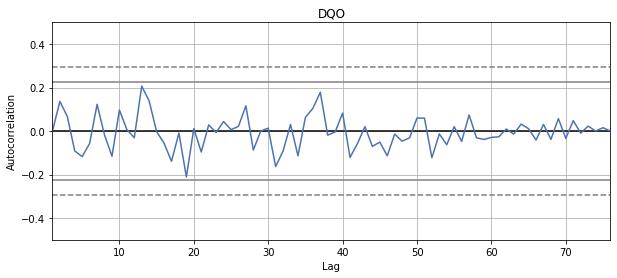

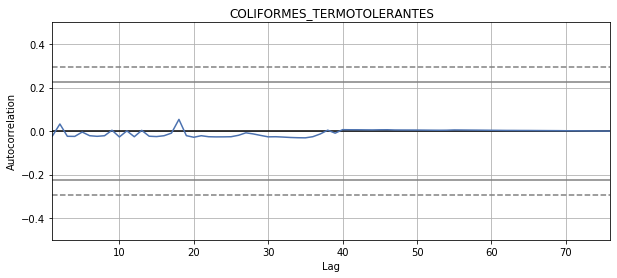

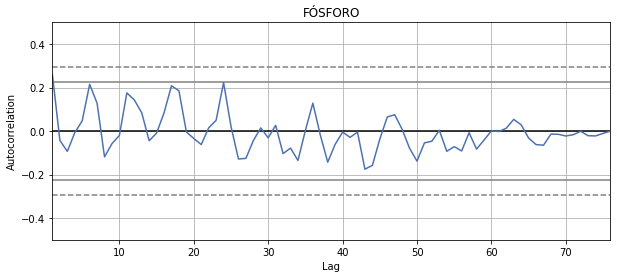

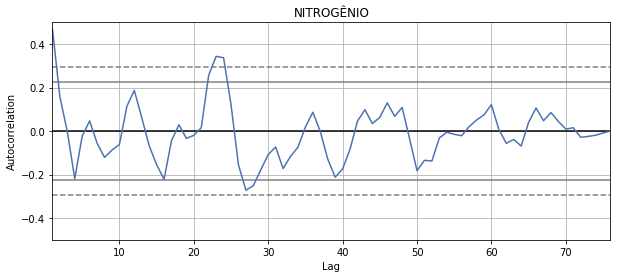

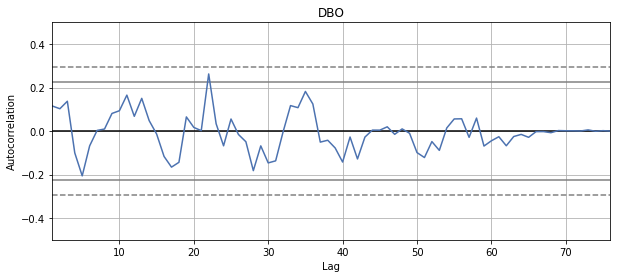

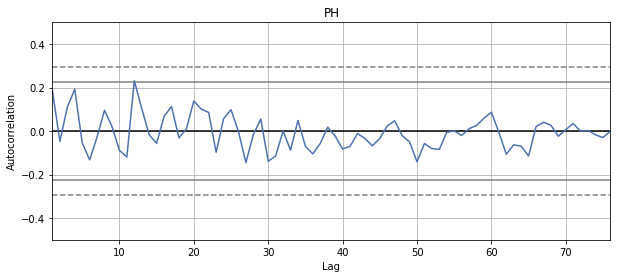

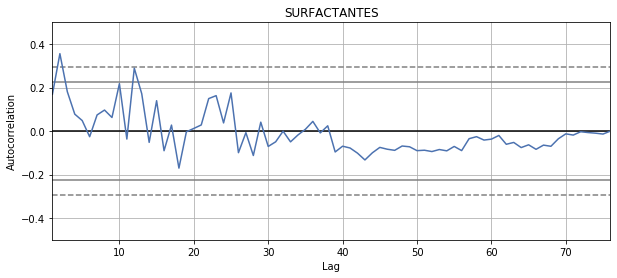

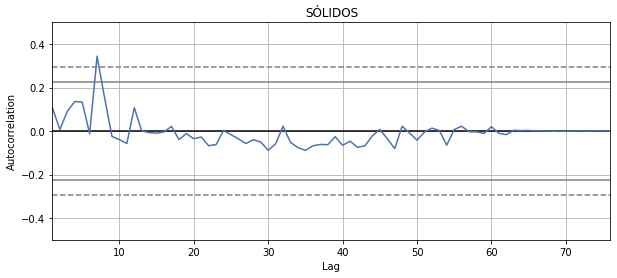

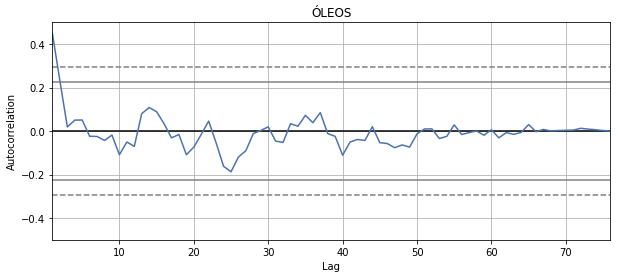

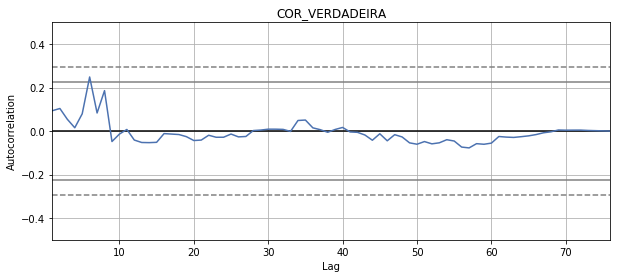

In [24]:
# Plotar gráfico de autocorrelação
for col in cols:
    series=df_sub[col]
    plt.figure(figsize=(10, 4))
    ax = pd.plotting.autocorrelation_plot(series)
    ax.set_ylim([-0.5, 0.5])
    plt.title(col);

## Decomposição sazonal
Utilizaremos decomposição sazonal nas séries temporais identificadas como estacionárias pelo teste de Dickey-Fuller

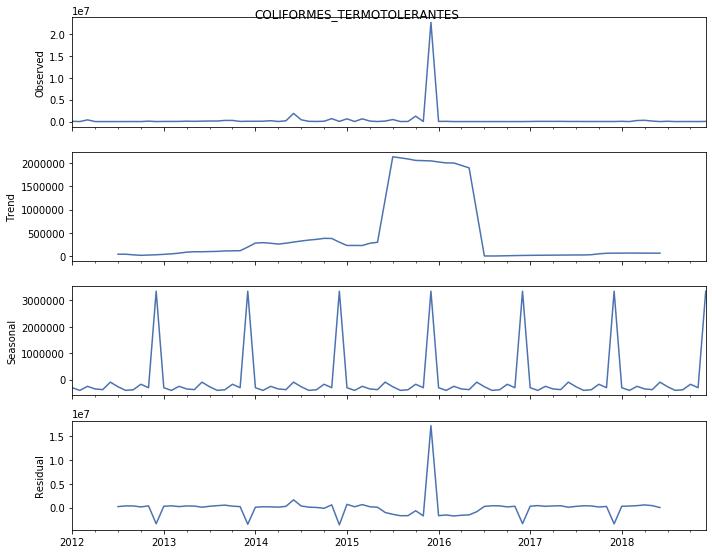

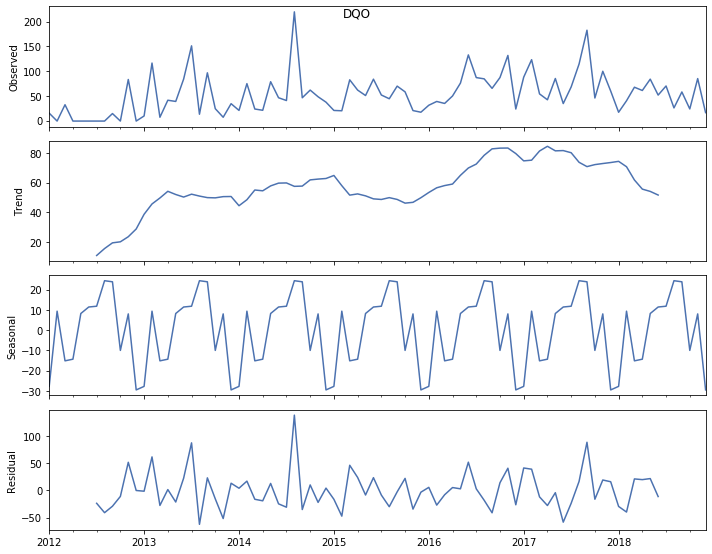

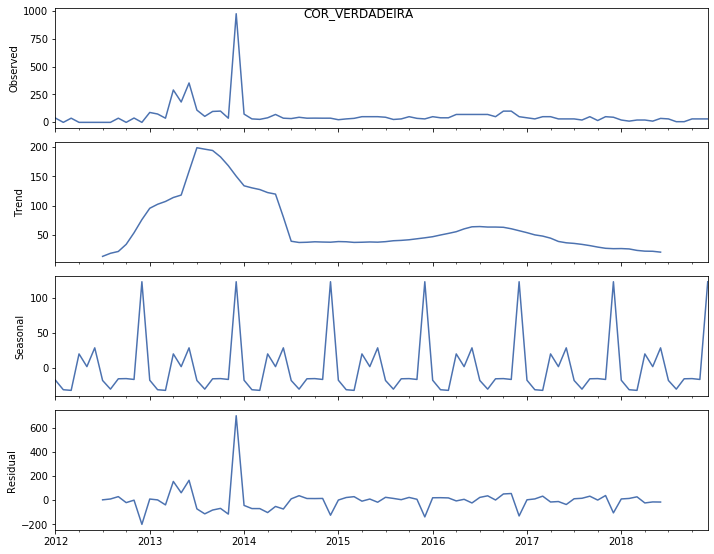

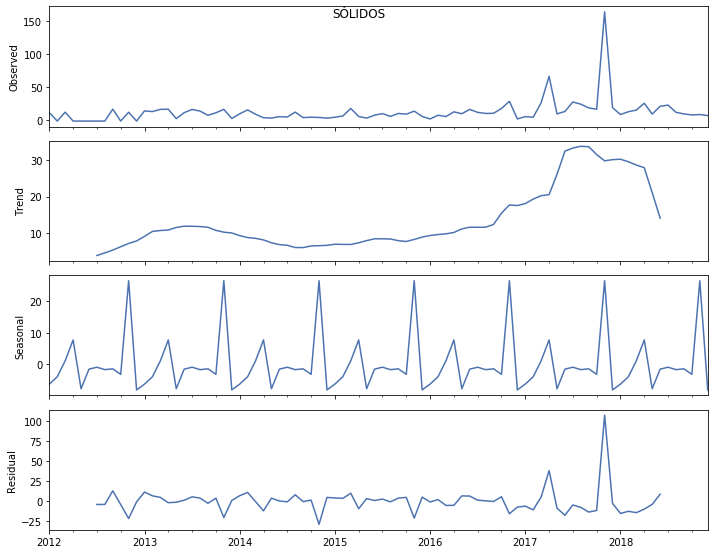

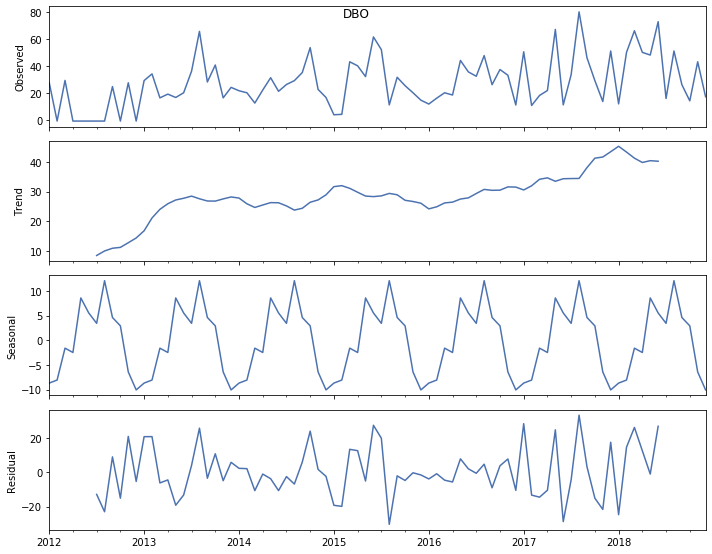

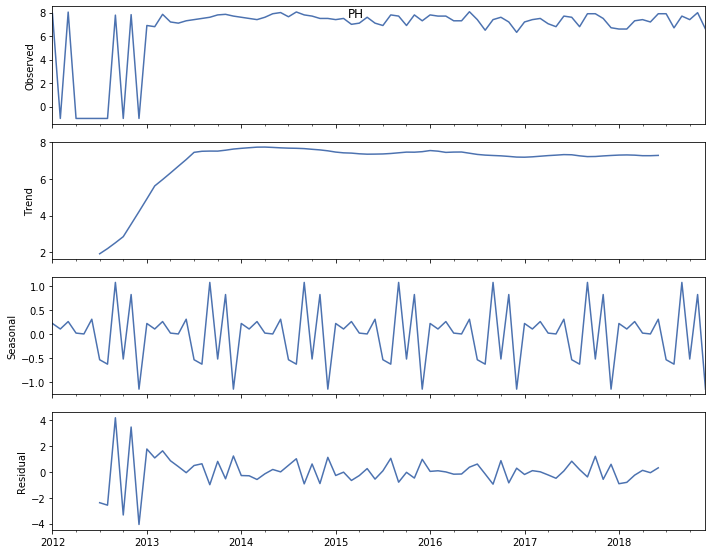

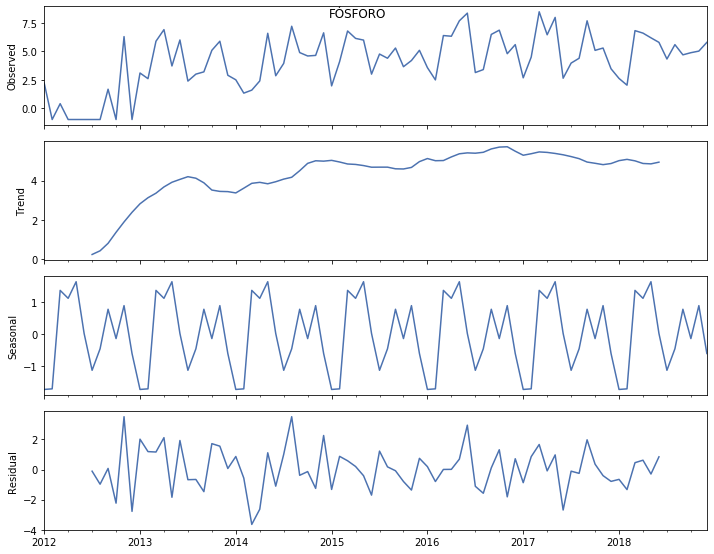

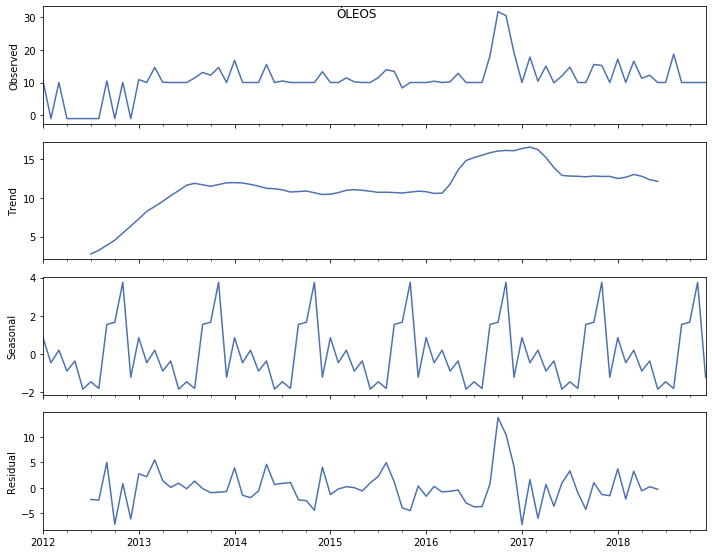

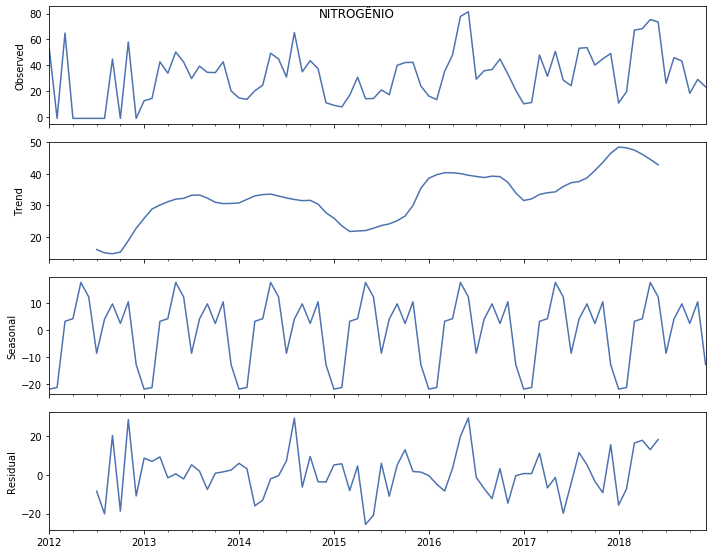

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Plotar 
for col in stationary.column.values:
    df_month = df_imputed[col].resample("M").mean()
    decompose = seasonal_decompose(df_month.fillna(-1), model='additive')
    decompose.plot()
    plt.xlabel("")
    plt.suptitle(col);

In [26]:
cols

Index(['DQO', 'COLIFORMES_TERMOTOLERANTES', 'FÓSFORO', 'NITROGÊNIO', 'DBO',
       'PH', 'SURFACTANTES', 'SÓLIDOS', 'ÓLEOS', 'COR_VERDADEIRA'],
      dtype='object')

In [27]:
copy2("EDA.ipynb", f"./EDA/EDA_{name}.ipynb")

'./EDA/EDA_p2.ipynb'